In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(palette='Set1')

## Vehicle counts on London main roads

In [3]:
df = pd.read_csv("data/main_road_vehicle_counts_years.csv") # 2MB file

In [4]:
dfyr = df.groupby('Year').mean().reset_index()
cyc_base = dfyr.iloc[0]['PedalCycles']
motor_base = dfyr.iloc[0]['AllMotorVehicles']
dfyr['Bicycles'] = dfyr['PedalCycles'] / cyc_base
dfyr['Other Vehicles'] = dfyr['AllMotorVehicles'] / motor_base
dfyr = dfyr[['Year','Bicycles','Other Vehicles']]
dfyr_melt = pd.melt(dfyr, id_vars=['Year'])
dfyr_melt.columns = ['Year','Vehicle type','Number']

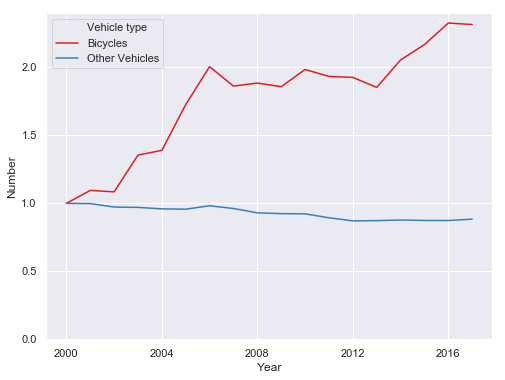

In [5]:
g = sns.lineplot(x='Year', y='Number', hue='Vehicle type', data=dfyr_melt)
g.set(ylim=(0,None),xticks=([2000,2004,2008,2012,2016]))
g.figure.set_size_inches(8,6)

## Mode of transport for journeys in London

In [10]:
tt = pd.read_csv('data/trips-pub-priv-walk-cycle.csv')
tt = tt[tt['Year']>=2000]
tt['all'] = tt['Cycle']+tt['Priv_Trans']+tt['Pub_Trans']+tt['Walk']
tt['Cycle-%'] = (tt['Cycle'] / tt['all']) * 100
tt['Private-%'] = (tt['Priv_Trans'] / tt['all']) * 100

#the below could be done more succinctly
ttyr = tt.groupby('Year').mean().reset_index()
ttyrabs = ttyr
cyc_base = ttyr.iloc[0]['Cycle']
priv_base = ttyr.iloc[0]['Priv_Trans']
pub_base = ttyr.iloc[0]['Pub_Trans']
walk_base = ttyr.iloc[0]['Walk']
all_base = ttyr.iloc[0]['all']

ttyr['Cycle'] = ttyr['Cycle'] / cyc_base
ttyr['Private_Transport'] = ttyr['Priv_Trans'] / priv_base
ttyr['Public_Transport'] = ttyr['Pub_Trans'] / pub_base
ttyr['Walk'] = ttyr['Walk'] / walk_base
ttyr['All'] = ttyr['all'] / all_base

ttyr = ttyr[['Year','Cycle','Private_Transport','Public_Transport','Walk','All']]
ttyr = pd.melt(ttyr, id_vars=['Year'])
ttyr.columns = ['Year','Journey type','Number']

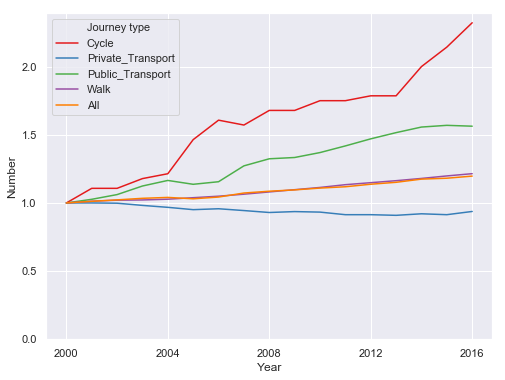

In [11]:
g = sns.lineplot(x='Year', y='Number', hue='Journey type', data=ttyr)
g.set(ylim=(0,None),xticks=([2000,2004,2008,2012,2016]))
g.figure.set_size_inches(8,6)

- Cycling has grown more rapidly than other forms of transport

## London Underground usage

In [7]:
t = pd.read_csv('data/ee.csv')
tg = t.groupby('Year').sum()
#tg.plot(y='Annual-e-and-e-million',ylim=(0,3500))
tg = tg.reset_index()

## Annual bus count data

In [8]:
buses = pd.read_csv('data/annual-buses.csv')
buses['Buses'] = buses['Buses'].astype(int)
#buses.plot(x='Year', ylim=(0,12000));

## London working age population

In [9]:
popn = pd.read_csv('data/popn-employment-rate.csv')
popn['All aged 16 to 64'] = popn['All aged 16 to 64'].astype(int)
popn = popn[popn['Year']>=2010]
popn['All aged 16 to 64'] = popn['All aged 16 to 64']/1000000
popn['Total in employment'] = popn['Total in employment']/1000000
popn = popn.rename(columns={'All aged 16 to 64':'All aged 16 to 64 (m)',
           'Total in employment':'Total in employment (m)'})
ann_popn = popn.groupby('Year').mean()
ann_popn = ann_popn.reset_index()
#ann_popn.plot(y=['All aged 16 to 64 (m)','Total in employment (m)'],ylim=(0,8));
ann_popnmm = ann_popn[ann_popn['All aged 16 to 64 (m)'].isin(
    [ann_popn['All aged 16 to 64 (m)'].min(),ann_popn['All aged 16 to 64 (m)'].max()])]
ann_popnmm.round(2).reset_index()

,index,Year,All aged 16 to 64 (m),Total in employment (m),Employment rate (%)
0,0,2010,5.52,3.74,67.72
1,8,2018,6.11,4.57,74.82


## Collate and plot together for comparison

In [10]:
ann = pd.DataFrame(list(range(2010,2018)))
ann.columns = ['Year']

In [11]:
ann['Bicycle use'] = dfyr['Bicycles']
ann['Underground use'] = list(tg['Annual-e-and-e-million']) / tg.iloc[0]['Annual-e-and-e-million']
ann['Buses in service'] = buses['Buses'] / buses.iloc[0]['Buses']
ann['Working age population'] = ann_popn['All aged 16 to 64 (m)'] / ann_popn.iloc[0]['All aged 16 to 64 (m)']
ann['Total in employment'] = ann_popn['Total in employment (m)'] / ann_popn.iloc[0]['Total in employment (m)']

In [12]:
ann_index = pd.melt(ann, id_vars=['Year'])
ann_index.columns = ['Year','Value','Number']

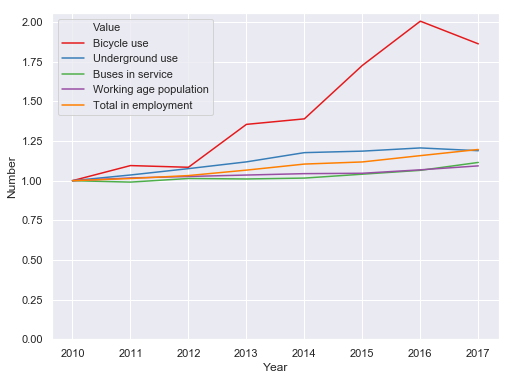

In [13]:
g = sns.lineplot(x='Year', y='Number', hue='Value', data=ann_index)
g.set(ylim=(0,None))
g.figure.set_size_inches(8,6)

- Increases in other public transport usage and provision is somewhat more in line with the increase in population
- Difficult to increase to capacity for these modes (financial, environmnental, geographical reasons)

## TfL Cycle Hire bikes in service

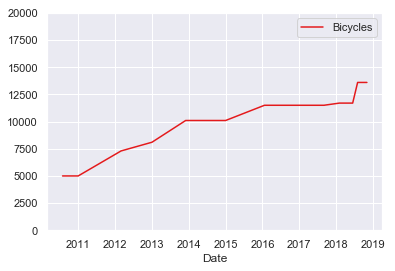

In [14]:
bb = pd.read_csv('data/hire-bike-volumes.csv')
bb = bb.rename(columns={'Stations':'Dock_Points'})
bb['Date'] = pd.to_datetime(bb['Date'], dayfirst=True).dt.date
#missing values imputed using last known or estimated value
bb = bb.fillna(method='ffill')
bb = bb.set_index('Date')
bb.plot(y='Bicycles',ylim=(0,20000));

## Motor fuel price history

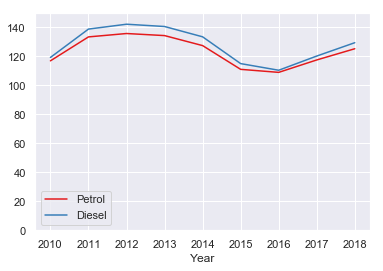

In [15]:
fuel = pd.read_csv('data/fuel-prices.csv')
fuel['Date'] = pd.to_datetime(fuel['Date'], dayfirst=True)
fuel['Year'] = fuel['Date'].dt.year
ann_fuel = fuel.groupby('Year').mean()
ann_fuel.plot(ylim=(0,150));

## Air pollution

In [16]:
nox = pd.read_csv('data/nox.csv')
nox['Date'] = pd.to_datetime(nox['Month'], dayfirst=True)
nox['Month'] = nox['Date'].dt.month
nox['Year'] = nox['Date'].dt.year
nox = nox.drop('Date', axis=1)
year_poll = nox.groupby('Year').mean()
hour_poll = nox.groupby('GMT').mean()
month_poll = nox.groupby('Month').mean()

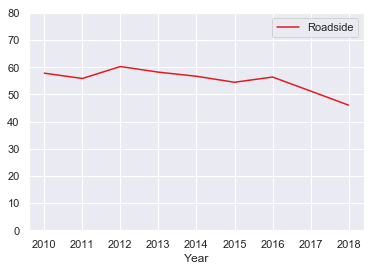

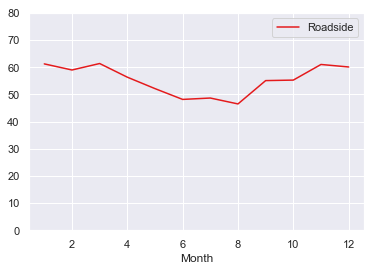

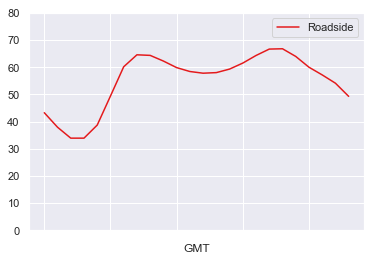

In [17]:
year_poll.plot(y='Roadside',ylim=(0,80));
month_poll.plot(y='Roadside',ylim=(0,80));
hour_poll.plot(y='Roadside',ylim=(0,80));

- Roadside pollution has declined a little faster than private transport volumes; vehicles may be getting cleaner or and/or the composition of vehicles types may be changing.
- Cycling does not decline in the summer months like roadside pollution does. Possible further investigation could be made into the effect of school holidays on overall journey volumes, the amount of people who switch modes of transport in summer (car to bike), and the contribution of the school run to road traffic volumes.
- Daily pollution levels follow a similar pattern to bike use, with peaks in the morning and afternoon rush hours.